In [1]:
# Instalasi pustaka yang diperlukan
!pip install -q sastrawi faiss-cpu sentence-transformers transformers accelerate networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.5 MB/s eta 0:00:00


In [2]:
# Impor pustaka
import requests
import json
import networkx as nx
import numpy as np
import faiss
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import matplotlib.pyplot as plt

In [3]:
# Unduh dataset
url = "https://raw.githubusercontent.com/Nocturnailed-Community/Pamolah-Intelegent/refs/heads/main/Datasets/NLP/augmented_realistic_dataset.json"
response = requests.get(url)
dataset = response.json() if response.status_code == 200 else []

# Ekstrak teks dan label
texts = [f"{entry['keluhan_umum']} {entry['lokasi_nyeri']} {entry['durasi_masalah']} {entry['gejala_tambahan']}" for entry in dataset]
labels = [entry['kelas'] for entry in dataset]

# Encoding label
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [4]:
# Bangun graph dari dataset
graph = nx.Graph()
for entry in dataset:
    nodes = [entry['keluhan_umum'], entry['lokasi_nyeri'], entry['durasi_masalah'], entry['gejala_tambahan'], entry['kelas']]
    for node in nodes:
        graph.add_node(node)
    edges = [(entry['keluhan_umum'], entry['lokasi_nyeri']),
             (entry['lokasi_nyeri'], entry['durasi_masalah']),
             (entry['durasi_masalah'], entry['gejala_tambahan']),
             (entry['gejala_tambahan'], entry['kelas'])]
    graph.add_edges_from(edges)

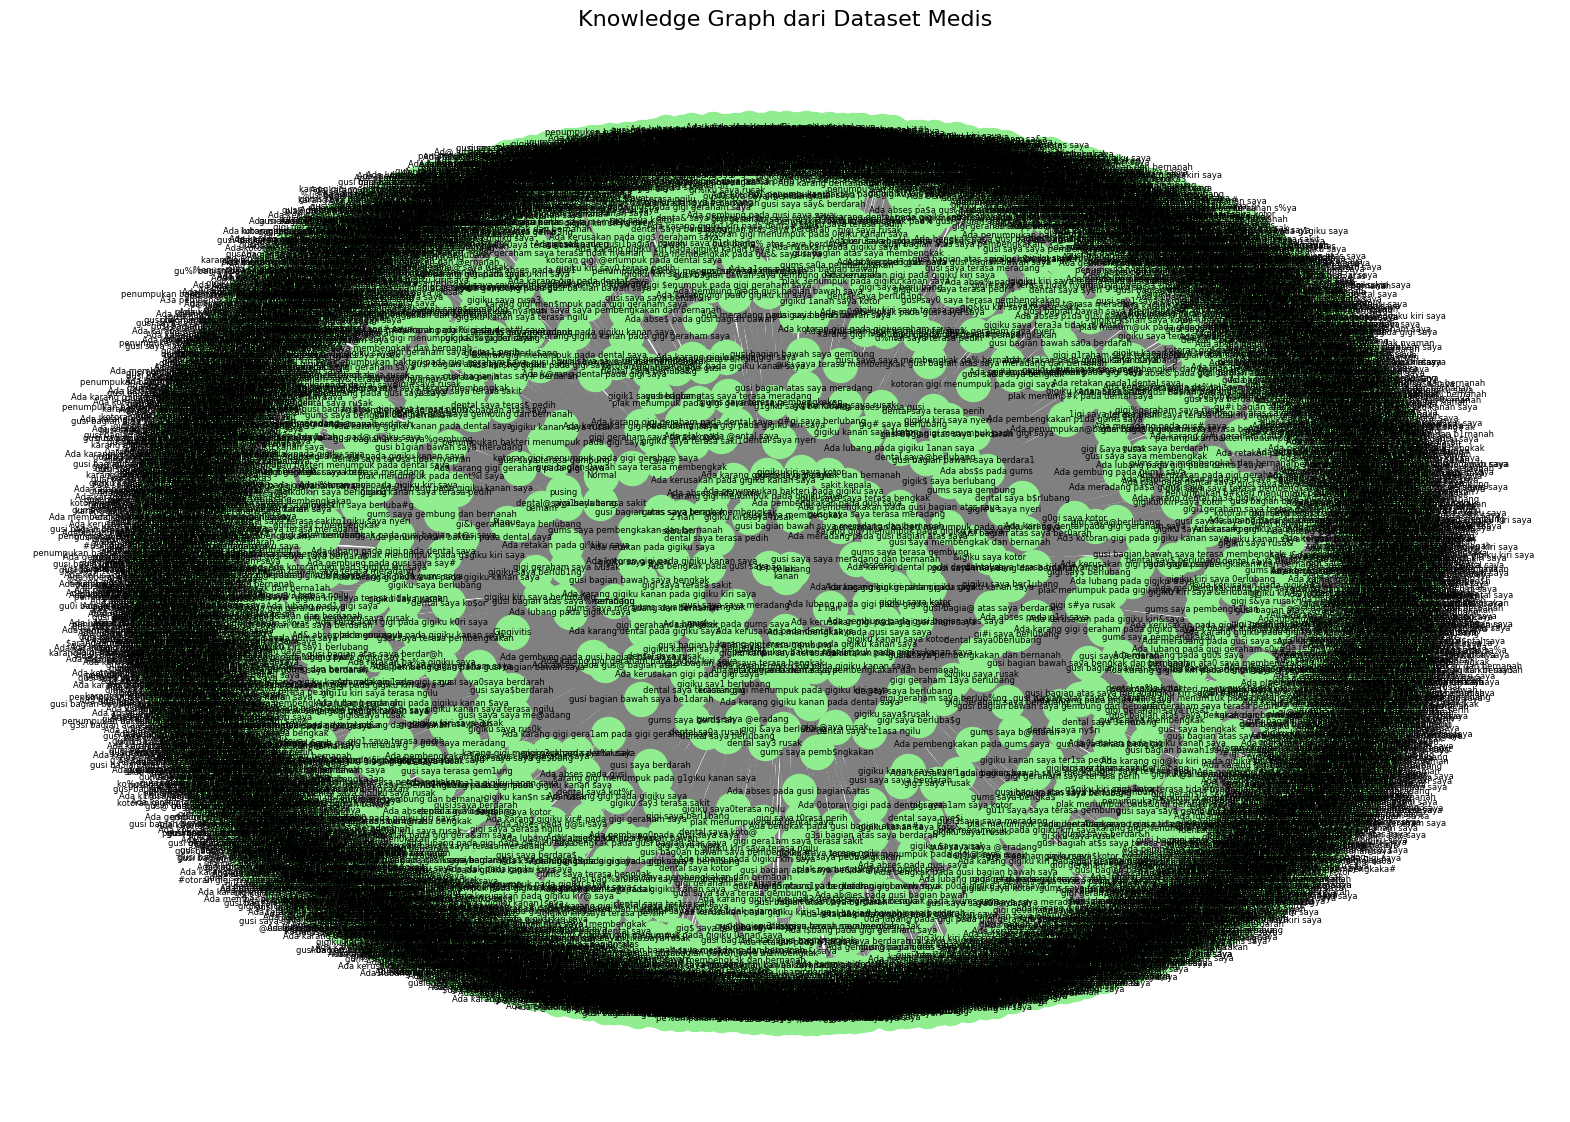

In [11]:
plt.figure(figsize=(20, 14))
pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=42)
nx.draw_networkx(graph, pos,
                 with_labels=True,
                 node_size=600,
                 font_size=6,
                 node_color="lightgreen",
                 edge_color="gray")
plt.title("Knowledge Graph dari Dataset Medis", fontsize=16)
plt.axis("off")
plt.show()

In [5]:
# Gunakan SentenceTransformer untuk embedding
embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
embeddings = embedding_model.encode(texts, convert_to_numpy=True)

# Bangun indeks FAISS
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
# Muat tokenizer dan model
model_name = "GoToCompany/llama3-8b-cpt-sahabatai-v1-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/143 [00:00<?, ?B/s]

In [15]:
def classify_medical_text(user_input, top_k=3):
    # Step 1: Buat embedding dari input pengguna
    input_embedding = embedding_model.encode([user_input], convert_to_numpy=True)

    # Step 2: Temukan top_k teks yang paling mirip
    distances, indices = index.search(input_embedding, top_k)
    retrieved_entries = [dataset[i] for i in indices[0]]
    retrieved_texts = [texts[i] for i in indices[0]]
    retrieved_labels = [labels[i] for i in indices[0]]

    # Step 3: Siapkan prompt awal
    prompt = "Anda adalah asisten medis pintar. Berdasarkan beberapa catatan medis berikut:\n"

    # Step 4: Tambahkan data dan relasi dari graph secara eksplisit
    for i, entry in enumerate(retrieved_entries):
        label = entry['kelas']
        text = f"{entry['keluhan_umum']} {entry['lokasi_nyeri']} {entry['durasi_masalah']} {entry['gejala_tambahan']}"
        prompt += f"- {text} (Label: {label})\n"

        # Ambil node dan relasi dari struktur field
        components = [entry['keluhan_umum'], entry['lokasi_nyeri'], entry['durasi_masalah'], entry['gejala_tambahan']]
        for node in components:
            if node in graph:
                neighbors = list(graph.neighbors(node))
                if neighbors:
                    prompt += f"  ↳ Relasi graf dari '{node}': {', '.join(neighbors)}\n"

    # Step 5: Tambahkan input pengguna dan instruksi klasifikasi
    prompt += (
        f"\nTentukan kelas keluhan medis paling sesuai untuk input pasien berikut:\n"
        f"\"{user_input}\"\n"
        f"Jawab hanya dengan salah satu dari: {', '.join(label_encoder.classes_)}.\n"
        "Jawaban:"
    )

    # Step 6: Tokenisasi dan inferensi LLM
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(model.device)
    output = model.generate(**inputs, max_new_tokens=20)
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    # Step 7: Cari kelas yang cocok dari output
    matched_class = None
    for label in label_encoder.classes_:
        if label.lower() in decoded_output.lower():
            matched_class = label
            break

    # Step 8: Fallback jika tidak dikenali
    if not matched_class:
        matched_class = max(set(retrieved_labels), key=retrieved_labels.count)

    return matched_class

In [16]:
# Contoh input
user_input = "saya merasa nyeri di bagian belakang gigi"

# Klasifikasi
prediction = classify_medical_text(user_input)
print("Hasil Prediksi:\n", prediction)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Hasil Prediksi:
 Normal


In [17]:
test_inputs = [
    "saya merasa nyeri di bagian belakang gigi",
    "gigi saya sakit dan ngilu sampai ke kepala",
    "nyeri tajam di rahang kiri sudah seminggu",
    "sakit di bagian gusi, terasa bengkak",
    "ngilu tiap minum dingin dan makan manis",
    "rasa sakit konstan di pipi bagian dalam",
    "gusi berdarah dan bengkak saat menyikat gigi",
    "nyeri berdenyut pada malam hari di gigi kanan bawah",
    "sakit saat menggigit makanan keras",
    "rasa nyut-nyutan di sekitar gigi geraham belakang"
]

# Uji semua input
for i, input_text in enumerate(test_inputs, 1):
    prediction = classify_medical_text(input_text)
    print(f"Input {i}: {input_text}")
    print(f"→ Prediksi: {prediction}\n")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 1: saya merasa nyeri di bagian belakang gigi
→ Prediksi: Normal



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 2: gigi saya sakit dan ngilu sampai ke kepala
→ Prediksi: Gingivitis



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 3: nyeri tajam di rahang kiri sudah seminggu
→ Prediksi: Normal



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 4: sakit di bagian gusi, terasa bengkak
→ Prediksi: Normal



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 5: ngilu tiap minum dingin dan makan manis
→ Prediksi: Gingivitis



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 6: rasa sakit konstan di pipi bagian dalam
→ Prediksi: Gingivitis



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 7: gusi berdarah dan bengkak saat menyikat gigi
→ Prediksi: Caries



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 8: nyeri berdenyut pada malam hari di gigi kanan bawah
→ Prediksi: Normal



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input 9: sakit saat menggigit makanan keras
→ Prediksi: Gingivitis

Input 10: rasa nyut-nyutan di sekitar gigi geraham belakang
→ Prediksi: Gingivitis

